In [9]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [7]:
mol = Chem.MolFromSmiles("C1C2C(C(S1)CCCCC(=O)O)NC(=O)N2")

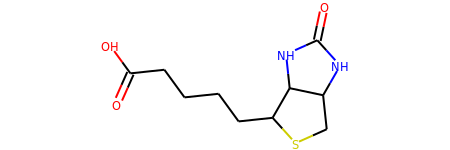

In [10]:
mol

In [11]:
AllChem.Compute2DCoords(mol)

0

In [13]:
Chem.MolToMolFile(mol, "/media/frek/Storage1/projects/personal/main/static/main/docs/biotin.mol")